# Ch03_PeerReview_Classification_Telecom_ChurnData_Report

## Requirements:
Sections required in your report:

1. Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation and the benefits that your analysis provides to the business or stakeholders of this data.

2. Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

3. Brief summary of data exploration and actions taken for data cleaning and feature engineering.

4. Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method.

5. A paragraph explaining which of your classifier models you recommend as a final model that best fits your needs in terms of accuracy and explainability.

6. Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classifier model.

7. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model after adding specific data features that may help you achieve a better explanation or a better prediction.

# Report: Main objective of analysis
Compare with multiple classification models to **make predictions** on customers churn or not.

It may help to make decisions in similar telecom companies and related business.

# Brief description of data
## Dataset - Telecom Industry - Churndata_processed.csv
I am using the customer **churn data** from the **telecom industry** that we used in the KNN Lab (03b_LAB_KNN). 

Since we preprocessed the data there, we will import the preprocessed data, which is in a file called: 'churndata_processed.csv'

## Setup and Import libaraies

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns
os.chdir('data')
from datasetup import churndata, colors, labels, palette
sns.set_palette(palette)

In [2]:
filepath = 'churndata_processed.csv'
data = pd.read_csv(filepath)

In [3]:
labels

{'id': 'Customer ID',
 'months': 'Tenure in Months',
 'offer': 'Offer',
 'phone': 'Phone Service',
 'multiple': 'Multiple Lines',
 'internet_type': 'Internet Type',
 'gb_mon': 'Avg Monthly GB Download',
 'security': 'Online Security',
 'backup': 'Online Backup',
 'protection': 'Device Protection Plan',
 'support': 'Premium Tech Support',
 'unlimited': 'Unlimited Data',
 'contract': 'Contract',
 'paperless': 'Paperless Billing',
 'payment': 'Payment Method',
 'monthly': 'Monthly Charge',
 'total_revenue': 'Total Revenue',
 'satisfaction': 'Satisfaction Score',
 'churn_value': 'Churn Value',
 'churn_score': 'Churn Score',
 'cltv': 'CLTV'}

## EDA

In [6]:
round(data.rename(columns=labels).describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Tenure in Months,7043.0,0.43,0.40,0.0,0.00,0.25,0.75,1.0
Multiple Lines,7043.0,0.42,0.49,0.0,0.00,0.00,1.00,1.0
Avg Monthly GB Download,7043.0,0.24,0.24,0.0,0.04,0.20,0.32,1.0
Online Security,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
Online Backup,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
Device Protection Plan,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
Premium Tech Support,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
Unlimited Data,7043.0,0.67,0.47,0.0,0.00,1.00,1.00,1.0
Contract,7043.0,0.38,0.42,0.0,0.00,0.00,1.00,1.0
Paperless Billing,7043.0,0.59,0.49,0.0,0.00,1.00,1.00,1.0


In [7]:
data.dtypes

months                       float64
multiple                       int64
gb_mon                       float64
security                       int64
backup                         int64
protection                     int64
support                        int64
unlimited                      int64
contract                     float64
paperless                      int64
monthly                      float64
satisfaction                 float64
churn_value                    int64
payment_Credit Card            int64
payment_Mailed Check           int64
internet_type_DSL              int64
internet_type_Fiber Optic      int64
internet_type_None             int64
offer_Offer A                  int64
offer_Offer B                  int64
offer_Offer C                  int64
offer_Offer D                  int64
offer_Offer E                  int64
dtype: object

<AxesSubplot:>

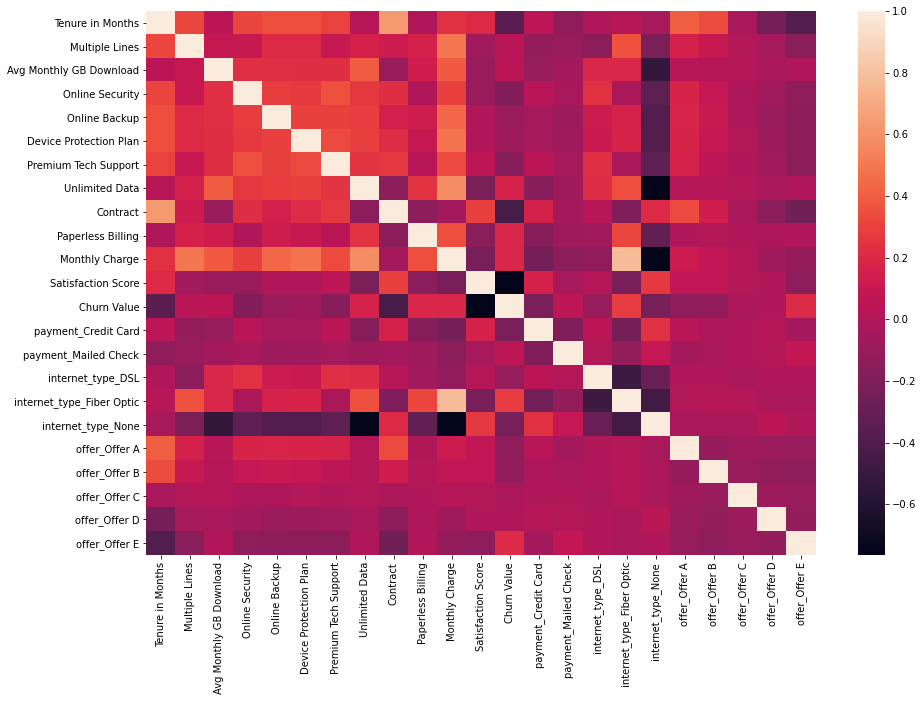

In [8]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data.rename(columns=labels).corr())

### Important features vs. churn_value 's correlationship

In [56]:
round(data.corr().loc['churn_value',:],2)

months                      -0.34
multiple                     0.04
gb_mon                       0.05
security                    -0.17
backup                      -0.08
protection                  -0.07
support                     -0.16
unlimited                    0.17
contract                    -0.44
paperless                    0.19
monthly                      0.19
satisfaction                -0.75
churn_value                  1.00
payment_Credit Card         -0.22
payment_Mailed Check         0.06
internet_type_DSL           -0.10
internet_type_Fiber Optic    0.28
internet_type_None          -0.23
offer_Offer A               -0.13
offer_Offer B               -0.12
offer_Offer C               -0.02
offer_Offer D                0.00
offer_Offer E                0.21
Name: churn_value, dtype: float64

In [41]:
data[['satisfaction','contract','months','churn_value']].corr().iloc[:,-1]

satisfaction   -0.754649
contract       -0.435398
months         -0.337205
churn_value     1.000000
Name: churn_value, dtype: float64

### Summary and insights of EDA
As the dataset is imported as "Churndata_processed" already, the part of data cleaning and feature engineering process was done before. 

However, from the raw data to this processed data, the part of data cleaning and feature engineering process can be summarized in three main sections. 

- drop irrevelant columns=['id', 'phone', 'total_revenue', 'cltv', 'churn_score'] from raw data
- transform binary variables, ordinal variables, and minmax scaler
- cut numberical variable 'months' into bins

Also, from the correlation above, there are some variables such as 'satisfaction','contract','months' are worthy to check more and useful for interpretations.

### Target value and preprocessing

In [15]:
data['churn_value'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn_value, dtype: float64

**Stratified Shuffle Split**

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

target = 'churn_value'
feature_cols = [x for x in data.columns if x!=target]
strat_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=1500, random_state=17)

train_idx, test_idx = next(strat_shuffle_split.split(data[feature_cols],data[target]))

X_train = data.loc[train_idx,feature_cols]
y_train = data.loc[train_idx,target]

X_test = data.loc[test_idx,feature_cols]
y_test = data.loc[test_idx,target]

In [31]:
y_train.value_counts(normalize=True)

0    0.73462
1    0.26538
Name: churn_value, dtype: float64

In [32]:
y_test.value_counts(normalize=True)

0    0.734667
1    0.265333
Name: churn_value, dtype: float64

# Models training

## Logistic regression with CV

In [57]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(Cs=10,cv=4,solver='liblinear',penalty='l2').fit(X_train,y_train)

In [60]:
y_pred_lr = lr.predict(X_test)

In [59]:
from sklearn.metrics import precision_recall_fscore_support as score, confusion_matrix, accuracy_score, roc_auc_score

In [124]:
def metrics(y_pred,models):
    precision, recall, fscore, _ = score(y_test,y_pred, average="weighted")
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred,average="weighted")
    metrics=list()
    metrics.append(pd.Series({'Precision':precision,'Recall':recall,
                          'F1':fscore,'Accuracy':accuracy ,'AUC':auc},name=models))
    metrics=pd.concat(metrics, axis=1)
    return metrics 

In [125]:
metrics(y_pred_lr, "Logistic Regression")

,Logistic Regression
Precision,0.953407
Recall,0.953333
F1,0.952559
Accuracy,0.953333
AUC,0.924901


Text(0.5, 1.0, 'Logistic Regression')

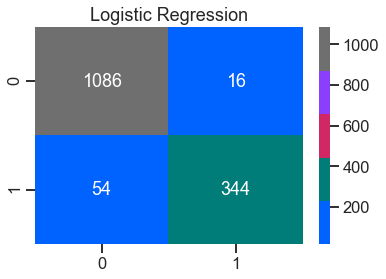

In [126]:
sns.heatmap(confusion_matrix(y_test,y_pred_lr), annot=True, fmt='d', cmap=colors)
plt.title("Logistic Regression")

## KNN with CV

In [80]:
from sklearn.metrics import f1_score, classification_report

In [83]:
from sklearn.neighbors import KNeighborsClassifier

max_k = 10
f1_scores = list()
error_rates =list()

for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred_k)
    f1_scores.append((k, round(f1_score(y_test, y_pred_k),4)))
    error = 1 -  round(accuracy_score(y_test, y_pred_k),4)
    error_rates.append((k,error))

f1_results = pd.DataFrame(f1_scores, columns = ['K','f1'])
error_results = pd.DataFrame(error_rates, columns = ['K','error rates'])

Text(0.5, 1.0, 'KNN f1 score')

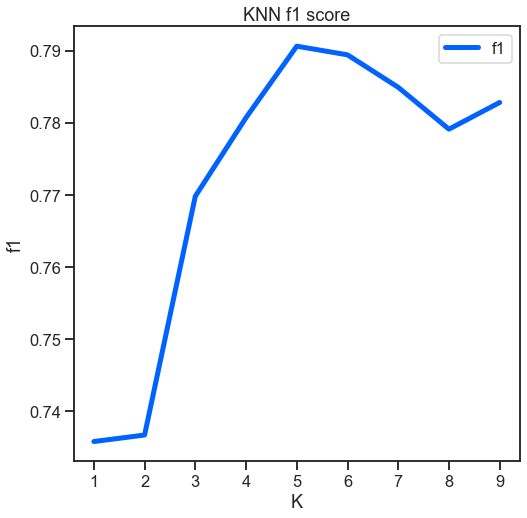

In [91]:
sns.set_style('ticks')
sns.set_context('talk')
ax = f1_results.set_index('K').plot(figsize=(8,8),linewidth=5)
ax.set(xlabel='K', ylabel='f1')
plt.title("KNN f1 score")B

Text(0.5, 1.0, 'KNN Error Rates')

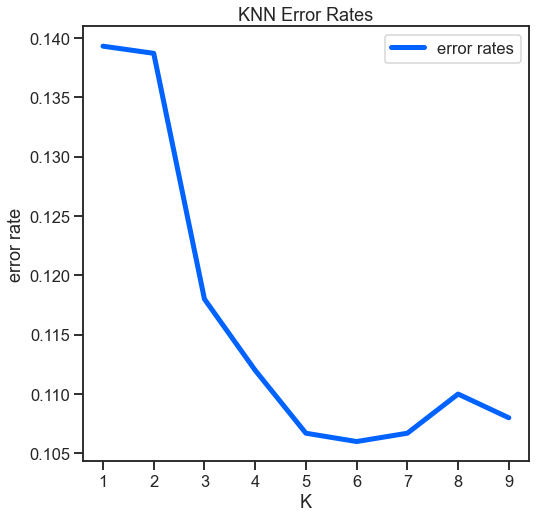

In [92]:
ax = error_results.set_index('K').plot(figsize=(8,8),linewidth=5)
ax.set(xlabel='K',ylabel='error rate')
plt.title("KNN Error Rates")

In [99]:
knn_final = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = knn_final.predict(X_test)

In [100]:
y_pred_knn

array([1, 0, 0, ..., 1, 0, 1])

In [102]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1102
           1       0.83      0.76      0.79       398

    accuracy                           0.89      1500
   macro avg       0.87      0.85      0.86      1500
weighted avg       0.89      0.89      0.89      1500



In [105]:
metrics(y_pred_knn,"KNN")

,KNN
Precision,0.892129
Recall,0.894000
F1,0.892587
Accuracy,0.894000
AUC,0.851615



## Random forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(oob_score=True, random_state=17, warm_start=True, n_jobs=-1)

oob_list = list()

for n_trees in [15,20,30,50,100,150,200,300]:
    rf.set_params(n_estimators = n_trees)
    rf.fit(X_train, y_train)
    
    oob_error = 1 - rf.oob_score_
    oob_list.append(pd.Series({'n_trees':n_trees, 'oob':oob_error}))
    
oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
oob_df

/Library/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Library/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


,oob
n_trees,
15.0,0.058272
20.0,0.052499
30.0,0.050875
50.0,0.047988
100.0,0.047447
150.0,0.047988
200.0,0.046184
300.0,0.046906


Text(0.5, 1.0, 'Random forest Out-of-bag rates')

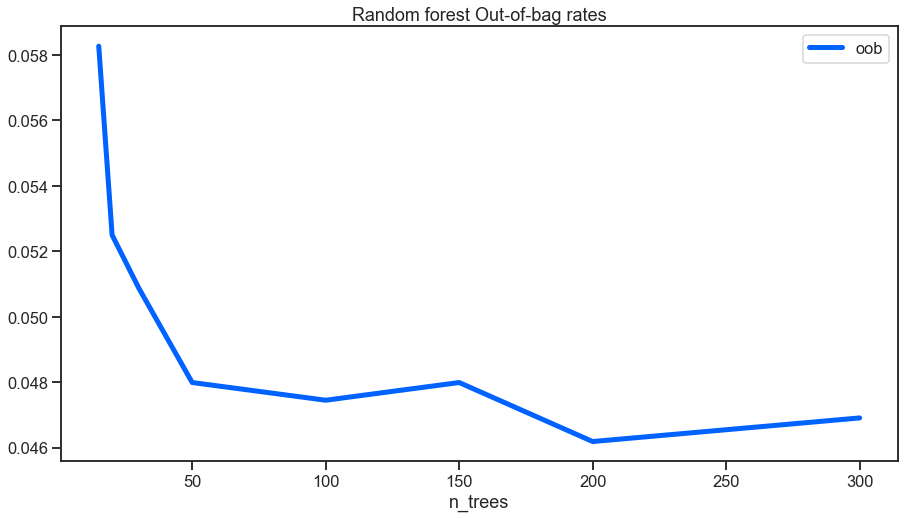

In [114]:
ax = oob_df.plot(figsize=(15,8),linewidth=5)
plt.title("Random forest Out-of-bag rates")

In [111]:
rf_final=RandomForestClassifier(n_estimators=200,random_state=17,n_jobs=-1, warm_start=True).fit(X_train, y_train)
y_pred_rf = rf_final.predict(X_test)

In [122]:
metrics(y_pred_rf, "Randome forest")

,Randome forest
Precision,0.947089
Recall,0.947333
F1,0.946534
Accuracy,0.947333
AUC,0.918410


Text(0.5, 1.0, 'Random forest')

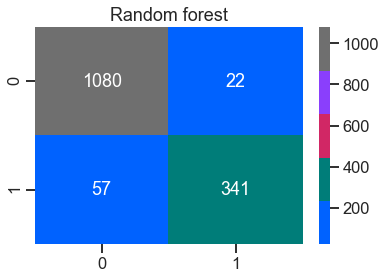

In [121]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf),annot=True,cmap=colors,fmt='d')
plt.title("Random forest")

## Gradient Boosting

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

oob_list=list()

for n_trees in [15,20,30,50,100,150,200,300]:

    gbc = GradientBoostingClassifier(n_estimators=n_trees, random_state=17)
    gbc.fit(X_train, y_train)
    y_pred_gbc = gbc.predict(X_test)
    
    error = 1 - accuracy_score(y_test, y_pred_gbc)
    oob_list.append(pd.Series({"n_trees":n_trees, "oob":error}))
    
error_df = pd.concat(oob_list, axis=1).T.set_index("n_trees")
error_df

,oob
n_trees,
15.0,0.064667
20.0,0.064667
30.0,0.059333
50.0,0.051333
100.0,0.048000
150.0,0.047333
200.0,0.045333
300.0,0.046667


Text(0.5, 1.0, 'Gradient Boosting Out-of-bag rate')

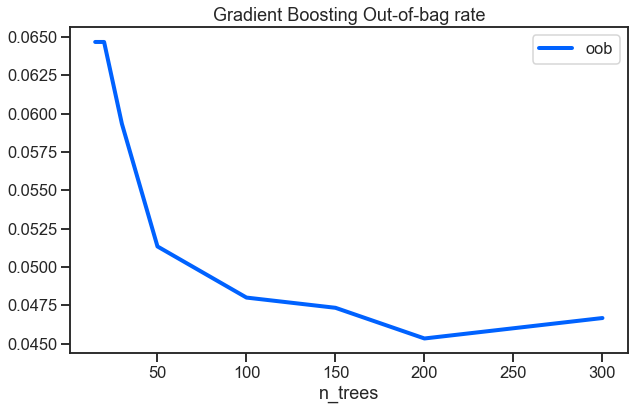

In [132]:
ax=error_df.plot(figsize=(10,6), linewidth=4)
plt.title("Gradient Boosting Out-of-bag rate")

In [133]:
gbc_final=GradientBoostingClassifier(n_estimators=200, random_state=17).fit(X_train, y_train)
y_pred_gbc = gbc_final.predict(X_test)

In [134]:
metrics(y_pred_gbc, "Gradient Boosting")

,Gradient Boosting
Precision,0.954500
Recall,0.954667
F1,0.954083
Accuracy,0.954667
AUC,0.929822


Text(0.5, 1.0, 'Gradient Boosting')

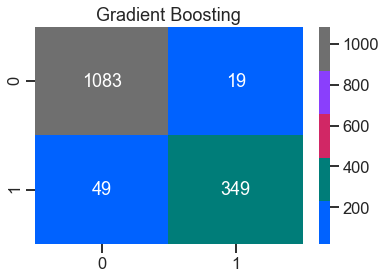

In [135]:
sns.heatmap(confusion_matrix(y_test, y_pred_gbc), annot=True, fmt='d', cmap=colors)
plt.title("Gradient Boosting")

## Stacking models
Logistic regression & Gradient boosting

In [136]:
from sklearn.ensemble import VotingClassifier

estimators = [('LR_l2',lr),('GBC',gbc_final)]

VC = VotingClassifier(estimators, voting='soft').fit(X_train, y_train)
y_pred_vc = VC.predict(X_test)

In [137]:
metrics(y_pred_vc, "Stacking models")

,Stacking models
Precision,0.953974
Recall,0.954000
F1,0.953302
Accuracy,0.954000
AUC,0.926960


Text(0.5, 1.0, 'Stacking models')

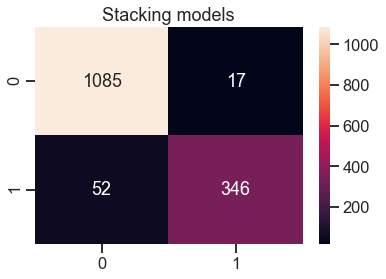

In [139]:
sns.heatmap(confusion_matrix(y_test, y_pred_vc), annot=True, fmt='d')
plt.title("Stacking models")

# Comparing models

In [166]:
df_lr = metrics(y_pred_lr,"Logistic Regression")
df_knn = metrics(y_pred_knn, "KNN")
df_rf = metrics(y_pred_rf,"Random Forest")
df_gbc = metrics(y_pred_gbc,"Gradient Boosting")
df_vc = metrics(y_pred_vc, "Stacking models - LR&GBC")

In [167]:
df = df_lr.join(df_knn).join(df_rf).join(df_gbc).join(df_vc)

## Conclusions
- **From the comparison above (5 models), the best model is Gradient Boosting Classifier with n_estimator=200.**
- **With Accuracy rate 95.4%, AUC 92.7%.**

In [168]:
df

,Logistic Regression,KNN,Random Forest,Gradient Boosting,Stacking models - LR&GBC
Precision,0.953407,0.892129,0.947089,0.954500,0.953974
Recall,0.953333,0.894000,0.947333,0.954667,0.954000
F1,0.952559,0.892587,0.946534,0.954083,0.953302
Accuracy,0.953333,0.894000,0.947333,0.954667,0.954000
AUC,0.924901,0.851615,0.918410,0.929822,0.926960


Text(0.5, 1.0, 'Models comparing')

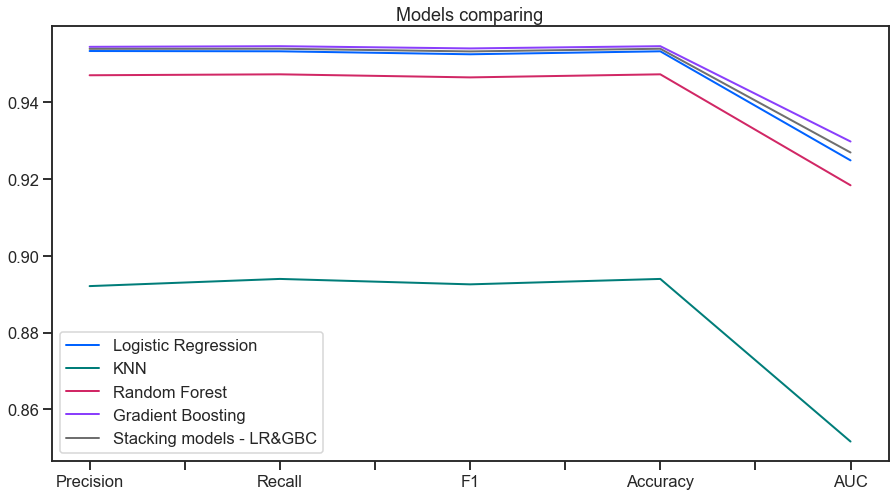

In [171]:
df.plot(figsize=(15,8),linewidth=2)
plt.title("Models comparing")

In [173]:
y_pred_gbc_prob = gbc_final.predict_proba(X_test)
y_pred_gbc_prob

array([[9.74710675e-01, 2.52893251e-02],
       [9.99566907e-01, 4.33092919e-04],
       [8.56296793e-01, 1.43703207e-01],
       ...,
       [1.00896394e-03, 9.98991036e-01],
       [9.99447791e-01, 5.52208911e-04],
       [1.60553431e-03, 9.98394466e-01]])

In [175]:
from sklearn.metrics import roc_curve, precision_recall_curve

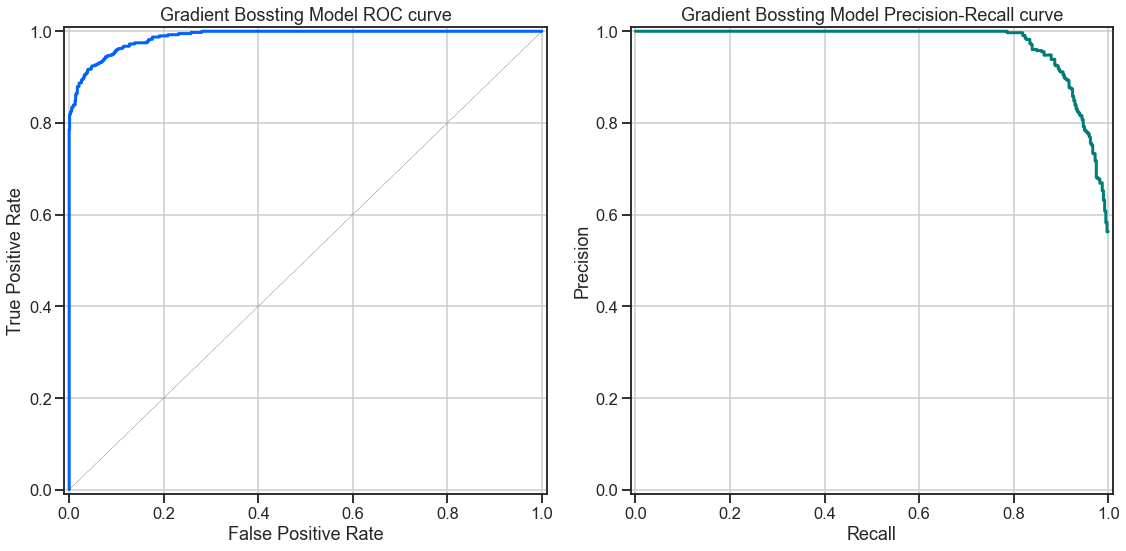

In [180]:
fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

ax = axList[0]
fpr, tpr, threshold = roc_curve(y_test, y_pred_gbc_prob[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=3)

ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Gradient Bossting Model ROC curve')
ax.grid(True)

ax = axList[1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_gbc_prob[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=3)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Gradient Bossting Model Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

## Suggestions

**Further possibilities:**
- Logistic regression model used 'l2' penalty. I suggest to use 'l1' penalty to try more, to figure out whether improvements it produce;
- Ensemble models seem to produce higher accuracy scores, however, it is suggested to try more ensemble models, e.g. Extra Trees (Bagging), AdaBoosting, XGBoosting models. Also, overfitting may be a concern;
- Here, the train-test split is used Stratified Shuffle Sampling. As the outcome variables(churn or not) is unbalanced. It may also be suggested to try other sampling techniques, e.g. downsampling / oversampling.